In [1]:
import os
import sys
sys.path.append('utils')
from dataset.spot import DailyDataset, PeriodDataset, get_loader, TOTAL_STD, TOTAL_MEAN
from tool import to_gpu
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import types

%matplotlib inline

In [2]:
from basic_model import GRU_a as Model

In [3]:
dataset = PeriodDataset(N=1600, W=14, P=1, USE_DAY=0, USE_WEEK=1)
loader = get_loader(dataset, batch_size=64, shuffle=True, num_workers=2)

Data build range: [window(2011-08-01 00:00:00) - 2011-08-15 00:00:00, 2015-12-31 00:00:00]


In [4]:
trainX, trainY = dataset.get_io('2011-07-01', '2015-12-31')
testX, testY = dataset.get_io('2011-07-01', '2016-08-30')
with torch.no_grad():
    test_period_input = to_gpu(testX)

In [5]:
PATH = './runs/forecast/'
run = 'gru_a'
model = to_gpu(Model(n_input=24, n_hidden=64, n_output=24))
model.load_state_dict(torch.load(os.path.join(PATH, run, 'snapshots20.pth')))

In [6]:
# test_period_output= model.forecast(test_period_input)

test_forecast = model.forecast(test_period_input, step=61)
test_period_forecast = test_forecast[-243:-61]
self_period_forecast = test_forecast[-61:]

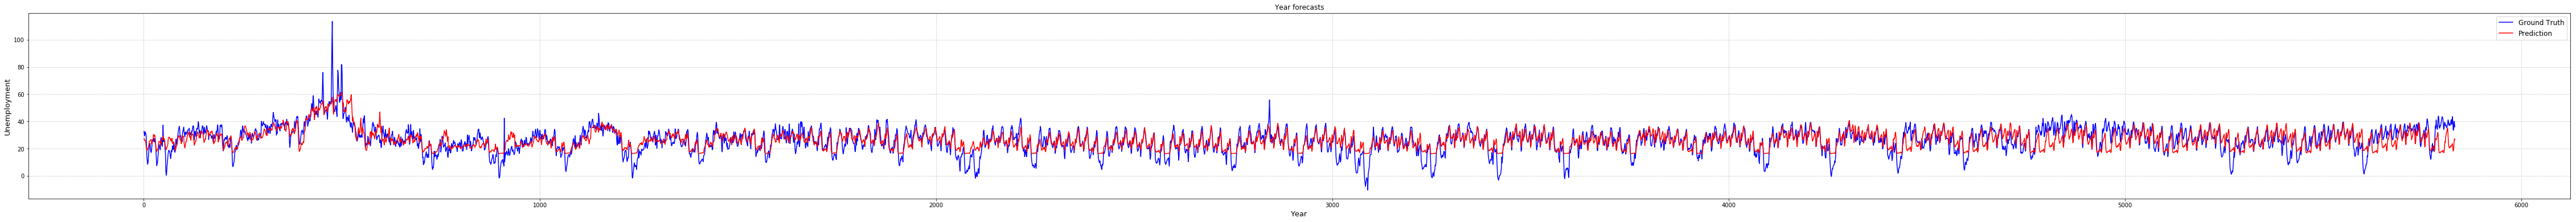

In [7]:
y_pred = torch.reshape(test_forecast[-243:].cpu(),(243*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY[-243:,:],(243*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

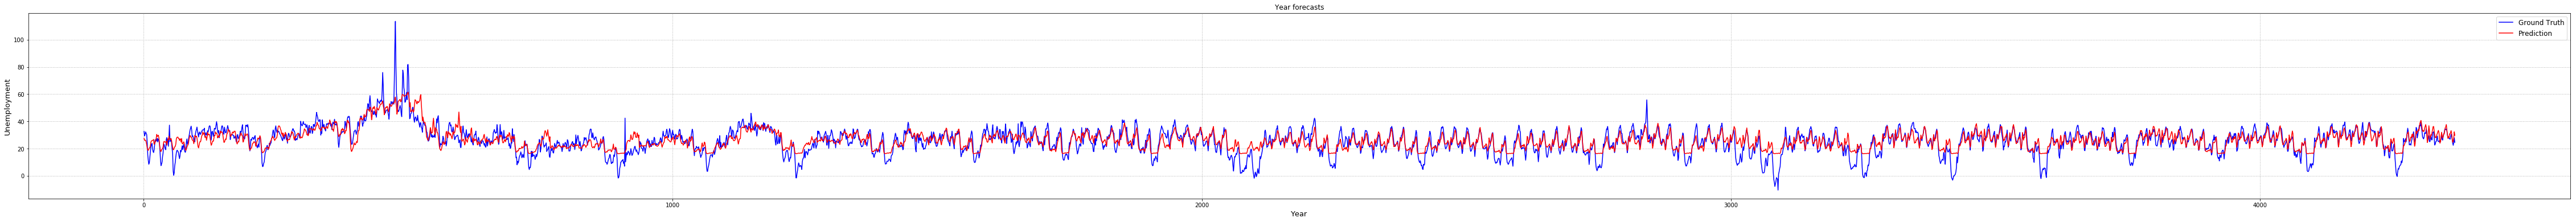

In [8]:
y_pred = torch.reshape(test_forecast[-243:-61].cpu(),(182*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY[-243:-61,:],(182*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-182*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-182*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

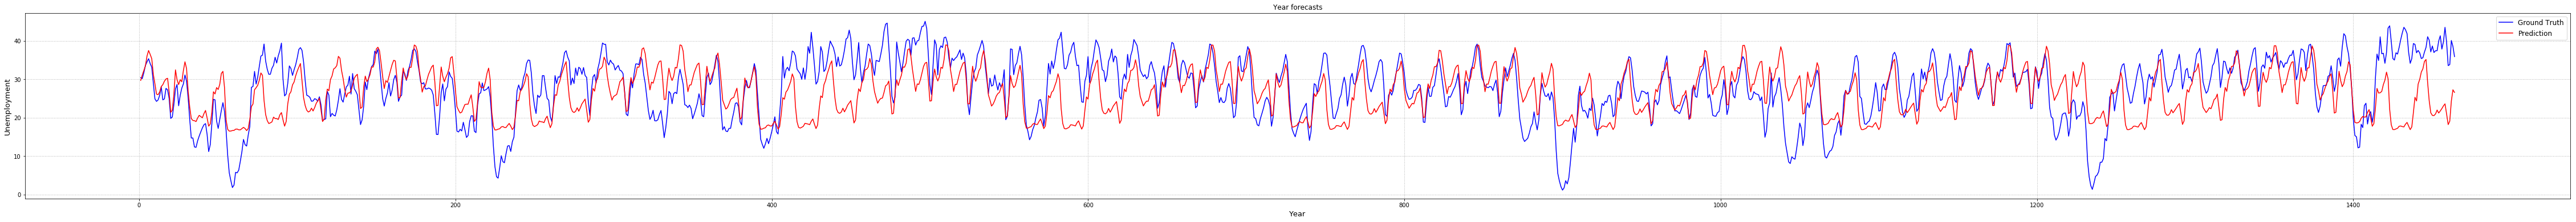

In [9]:
y_pred = torch.reshape(self_period_forecast.cpu(),(61*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY[-61:,:],(61*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 61*24, 61*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-61*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-61*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()